In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt

## Loading data

In [2]:
data = pd.read_csv('./Affinity-City-Daily-final.csv').drop(['spend_all'], axis=1)

In [3]:
col = data.columns
y = data[data.columns[8]]
X = data[[col[4], col[5], col[6], col[7]]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

In [5]:
X_train

,spend_acf,spend_aer,spend_grf,spend_hcs
0,-0.00322,0.00706,0.00389,-0.03550
1,0.00660,-0.07790,-0.00956,0.06040
2,-0.10400,0.03340,0.01240,-0.00547
3,-0.03560,-0.15000,0.00405,0.03050
4,-0.00770,-0.04040,0.00888,-0.00653
...,...,...,...,...
6120,-0.47400,-0.72400,0.16800,-0.50900
6121,-0.66500,-0.64800,0.17200,-0.46300
6122,-0.67500,-0.76100,0.31600,-0.77700
6123,-0.56600,-0.69100,0.02870,-0.29500


### Testing model with degree = 1

In [6]:
regressioner = Pipeline([
        ("scale", StandardScaler()),
        ("degree1", PolynomialFeatures(degree=1, include_bias=False)),
        ("estimate", LinearRegression()),
    ])
regressioner.fit(X_train, y_train)
y_train_pred, y_test_pred = regressioner.predict(X_train), regressioner.predict(X_test)
MSE_train, MSE_test = mse(y_train, y_train_pred), mse(y_test, y_test_pred)
print("MSE for train data = {} and MSE for test data = {}".format(MSE_train, MSE_test))

MSE for train data = 0.006645750099123938 and MSE for test data = 0.012887329819480323


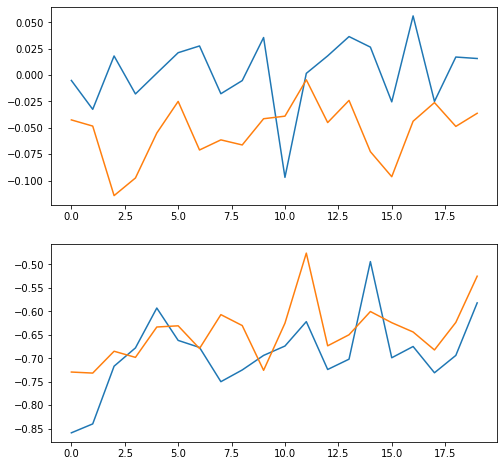

In [7]:
fig, axs = plt.subplots(2,1, figsize=(8,8))
ax1, ax2 = axs.flatten()

num_plot_points = 20

x1 = np.arange(num_plot_points)
ax1.plot(x1, y_train[:num_plot_points])
ax1.plot(x1, y_train_pred[:num_plot_points])

x2 = np.arange(num_plot_points)
ax2.plot(x2, y_test[:num_plot_points])
ax2.plot(x2, y_test_pred[:num_plot_points])

### Finding the best model

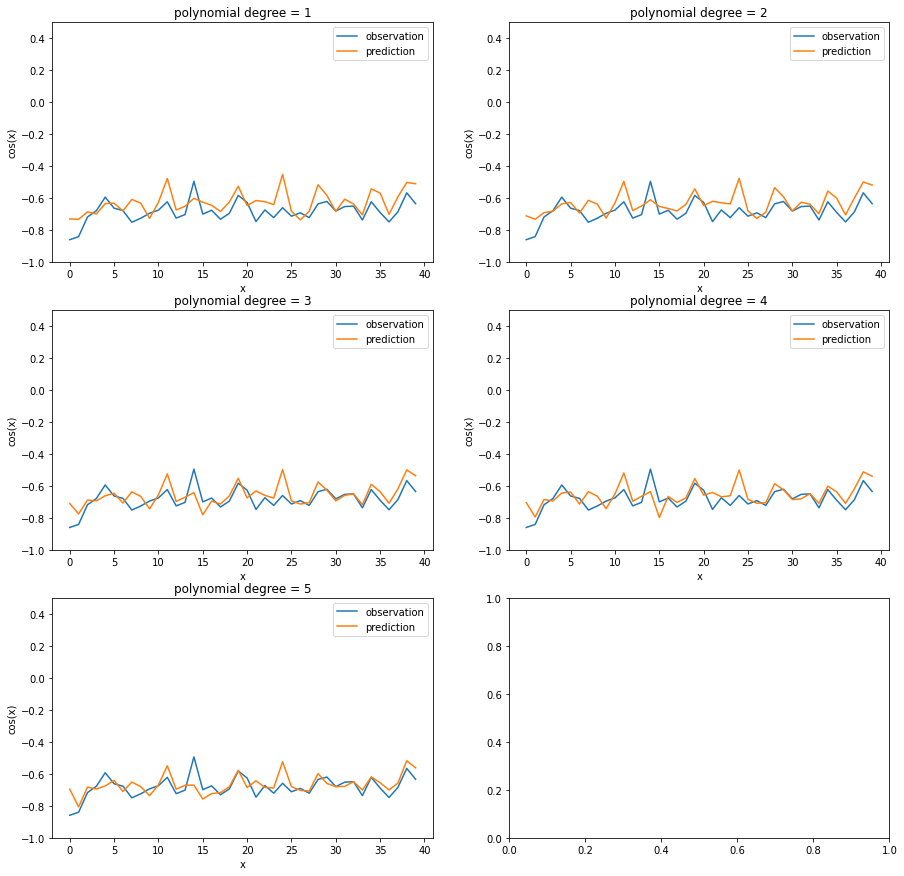

In [8]:
degrees = np.arange(1, 6)
fig, axs = plt.subplots(3,2, figsize=(15,15))
axs = axs.flatten()
MSE_trains = []
MSE_tests = []

models = {}

for i, deg in enumerate(degrees):
    regressioner = Pipeline([
        ("scale", StandardScaler()),
        ("degree1", PolynomialFeatures(degree=deg, include_bias=False)),
        ("estimate", LinearRegression())
    ])
    regressioner.fit(X_train, y_train)
    
    models[deg] = regressioner
    
    y_train_pred, y_test_pred = regressioner.predict(X_train), regressioner.predict(X_test)
    MSE_train, MSE_test = mse(y_train, y_train_pred), mse(y_test, y_test_pred)
    MSE_trains.append(MSE_train)
    MSE_tests.append(MSE_test)
    
    num_plot_points = 40
    x = np.arange(num_plot_points)
    axs[i].plot(x, y_test[:num_plot_points], label='observation')
    axs[i].plot(x, y_test_pred[:num_plot_points], label='prediction')
    axs[i].set_ylim(-2, 2)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('cos(x)')
    axs[i].set_title('polynomial degree = ' + str(deg))
    axs[i].set_ylim(-1, 0.5)
    axs[i].legend()

Text(0.5, 0, 'degree')

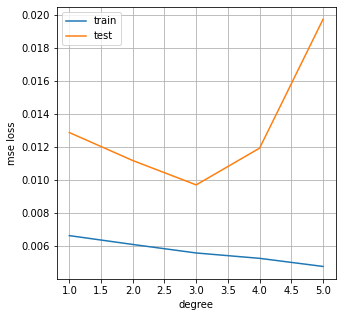

In [9]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(degrees, MSE_trains, label='train')
ax.plot(degrees, MSE_tests, label='test')
ax.grid()
ax.legend()
ax.set_ylabel('mse loss')
ax.set_xlabel('degree')

### As we can see the degree = 3 has the best performance

### Using the best model ---> degree = 3

In [10]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("degree1", PolynomialFeatures(degree=deg, include_bias=False)),
    ("estimate", LinearRegression())
])
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
MSE_train, MSE_test = mse(y_train, y_train_pred), mse(y_test, y_test_pred)
print("MSE for train data = {} and MSE for test data = {}".format(MSE_train, MSE_test))

MSE for train data = 0.004779457506202888 and MSE for test data = 0.019743886484480534


Text(0, 0.5, 'y')

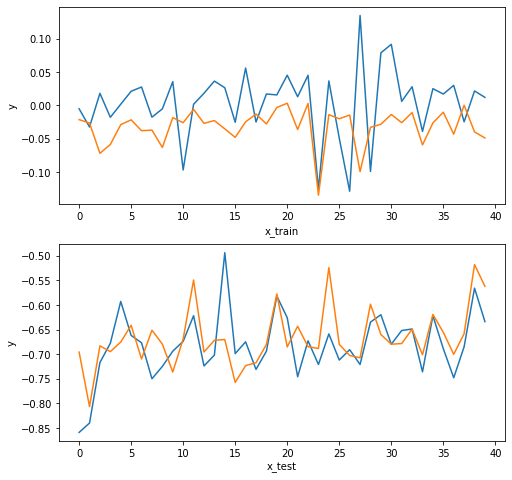

In [11]:
fig, axs = plt.subplots(2,1, figsize=(8,8))
ax1, ax2 = axs.flatten()

num_plot_points = 40

x1 = np.arange(num_plot_points)
ax1.plot(x1, y_train[:num_plot_points], label='observation')
ax1.plot(x1, y_train_pred[:num_plot_points], label='prediction')
ax1.set_xlabel('x_train')
ax1.set_ylabel('y')

x2 = np.arange(num_plot_points)
ax2.plot(x2, y_test[:num_plot_points], label='observation')
ax2.plot(x2, y_test_pred[:num_plot_points], label='prediction')
ax2.set_xlabel('x_test')
ax2.set_ylabel('y')

## Conclusion:
### We can see that the degree=3 model prediction is closer to the observation than degree=1 which we saw first.